In [1]:
%load_ext watermark
%watermark -v -n -m -p numpy,scipy, sklearn, pandas
%load_ext autoreload
%autoreload 1

Wed Nov 27 2019 

CPython 3.7.5
IPython 7.9.0

numpy 1.17.3
scipy 1.3.1
sklearn 0.21.3
pandas 0.25.3

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [9]:
fname_tr = 'C:\\Users\\orteg\\Dropbox\\1Almacen\\Computer_Science\\ML_AI\\5_PhD_Fraud_Analytics\\Noise_Label\\data\\processed\\trans_noisy_train.pkl'

In [19]:
import sys
sys.path.append('C:\\Users\\orteg\\Dropbox\\1Almacen\\Computer_Science\\ML_AI\\5_PhD_Fraud_Analytics\\Noise_Label\\labcleaning\\preprocessing')
sys.path.append('C:\\Users\\orteg\\Dropbox\\1Almacen\\Computer_Science\\ML_AI\\5_PhD_Fraud_Analytics\\Noise_Label\\labcleaning\\models')
from sklearn.ensemble import IsolationForest
from models_utils import read_processed_data
from labcleaner import LabelCleaner
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = read_processed_data(fname_tr)

m1 = LabelCleaner()
df_neg = m1.anomaly_neg(df)
q = np.quantile(df_neg['anomaly_score'],0.20)
df_neg_rus = m1.labclean(df_neg,q,0.20)

C:\Users\orteg\Anaconda3\envs\noise_label\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\orteg\Anaconda3\envs\noise_label\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


,ACTIVE_DAYS,ACTIVE_WEEKS,ACTIVE_MONTHS,PAYMENT_DELAY,COUNT_PAY_DELAYS,ANNUAL_PAY_DELAY,RECEIPT_DELAYS,COMPLAINT_2WEEKS,COMPLAINT_3MONTHS,COMPLAINT_6MONTHS,...,MINUTES_OUT_OFFNET_WKD_1MONTH,MINUTES_OUT_ONNET_WKD_1MONTH,MINUTES_INC_ONNET_3MONTH,MINUTES_INC_OFFNET_3MONTH,PREPAID_BEFORE,COLLECTIONS,COMPLAINT_1MONTH,noisy_label,CHURN,anomaly_score
0,-0.505112,-0.508701,-0.501816,-0.188526,-0.942956,-0.361038,-0.240146,8.196652,2.793865,1.795284,...,-0.268265,-0.194452,-0.362971,-0.433554,0,1,0,0,0,0.031492
1,-0.387553,-0.384817,-0.386474,-0.188526,2.468956,-0.038976,-0.240146,-0.179773,-0.408974,-0.538317,...,-0.748369,-0.563879,-0.321057,-0.281626,0,0,0,0,1,0.043134
2,-0.860315,-0.862656,-0.847841,-0.188526,2.848057,0.665535,-0.240146,-0.179773,-0.408974,-0.538317,...,-0.705715,-0.642756,1.876199,0.208918,0,0,0,0,1,0.060175
3,1.139443,1.137187,1.151419,0.366180,0.952551,-0.089298,1.848026,-0.179773,-0.408974,-0.538317,...,-0.158499,-0.642756,3.313399,2.138075,0,0,0,0,1,-0.003663
4,-0.517752,-0.517550,-0.501816,0.366180,2.848057,6.160726,1.848026,-0.179773,-0.408974,-0.538317,...,-0.756172,-0.642756,-0.261906,-0.512545,0,0,0,0,1,0.072713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,-0.463397,-0.464457,-0.463368,-0.188526,-0.942956,-0.361038,-0.240146,-0.179773,-0.408974,-0.538317,...,-0.756172,-0.161748,-0.333482,-0.428106,1,0,0,0,0,0.140697
3094,0.930872,0.933663,0.920735,-0.188526,-0.942956,-0.361038,-0.240146,-0.179773,-0.408974,-0.538317,...,0.580649,-0.291834,-0.343050,-0.461441,0,0,0,0,0,0.143785
3095,-0.650480,-0.650283,-0.655605,-0.188526,-0.563855,-0.350974,-0.240146,-0.179773,-0.408974,-0.538317,...,-0.332776,-0.340394,-0.401737,-0.417876,0,0,0,0,0,0.162376
3096,-0.829978,-0.827260,-0.847841,-0.188526,-0.942956,-0.361038,-0.240146,-0.179773,-0.408974,-0.538317,...,-0.756172,-0.642756,-0.424342,-0.499926,0,0,0,0,1,0.161669


Text(0, 0.5, 'Density')

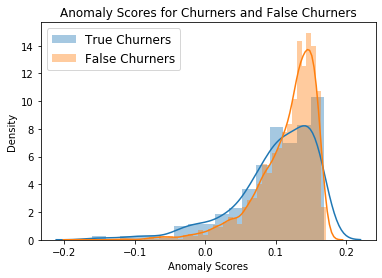

In [21]:
df_truechurns = df_neg[df_neg.CHURN == 1]
sns.distplot(df_truechurns['anomaly_score'],  kde=True, label='True Churners')
df_falsechurns =df_neg[df_neg.CHURN == 0]
sns.distplot(df_falsechurns['anomaly_score'],  kde=True,label='False Churners')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Anomaly Scores for Churners and False Churners')
plt.xlabel('Anomaly Scores')
plt.ylabel('Density')

In [22]:
# Basic Stats

print('mean of anomaly scores in outlier group: ', np.mean(df_truechurns['anomaly_score']))
print('mean of anomaly scores in inlier group: ', np.mean(df_falsechurns['anomaly_score']))

mean of anomaly scores in outlier group:  0.09913849767658744
mean of anomaly scores in inlier group:  0.11554577804008659
